# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Anjas Rani
- **Email:** anjasgans841@gmail.com
- **ID Dicoding:** anjaszz

## Menentukan Pertanyaan Bisnis

- Bagaimana pendapatan (revenue) per bulan pada e-commerce selama satu tahun terakhir (2018)?
- Berapa persentase metode pembayaran yang paling banyak digunakan selama periode tersebut?
- Berdasarkan skor ulasan (review score), bagaimana kepuasan pelanggan terhadap kategori produk tertentu?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/master/olist_customers_dataset.csv')
customers_df.head()
orders_df = pd.read_csv("https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/master/olist_orders_dataset.csv")
orders_df.head()
order_items_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/master/olist_order_items_dataset.csv')
order_items_df.head()
order_payments_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/master/olist_order_payments_dataset.csv')
order_payments_df.head()
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/master/olist_geolocation_dataset.csv')
geolocation_df.head()
order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/refs/heads/master/olist_order_reviews_dataset.csv')
order_reviews_df.head()
product_category_name_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/refs/heads/master/product_category_name_translation.csv')
product_category_name_df.head()
product_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/refs/heads/master/olist_products_dataset.csv')
product_df.head()
sellers_df = pd.read_csv('https://raw.githubusercontent.com/Anjaszz/dataset-ecommerce/refs/heads/master/olist_sellers_dataset.csv')
sellers_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data dari berbagai sumber memberikan gambaran lengkap tentang transaksi dan interaksi pelanggan.
- Penggabungan dataset mendukung analisis kinerja produk, kepuasan pelanggan, dan pengiriman.
- Setiap dataset penting untuk mengeksplorasi hubungan antara lokasi, pembayaran, dan kategori produk.

### Assessing Data

In [24]:
customers_df.info()
customers_df.describe()
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [25]:
geolocation_df.info()
geolocation_df.describe()
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [26]:
order_items_df.info()
order_items_df.describe()
order_items_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [27]:
order_payments_df.info()
order_payments_df.describe()
order_payments_df.isna().sum()
order_payments_df['payment_type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [28]:
order_reviews_df.info()
order_reviews_df.describe()
order_reviews_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [29]:
orders_df.info()
orders_df.describe()
orders_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [30]:
product_category_name_df.info()
product_category_name_df.describe()
product_category_name_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [31]:
product_df.info()
product_df.describe()
product_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [32]:
sellers_df.info()
sellers_df.describe()
sellers_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


**Insight:**
- Dataset mengandung data yang lengkap namun terdapat beberapa nilai yang hilang dan perlu penanganan lebih lanjut.
- Format tipe data seperti tanggal dan kategori produk perlu dikonversi untuk keperluan analisis.
- Duplikasi data perlu dicek untuk memastikan keakuratan analisis.

### Cleaning Data

In [33]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df['order_approved_at'].fillna(pd.NaT, inplace=True)
orders_df['order_delivered_carrier_date'].fillna(pd.NaT, inplace=True)
orders_df['order_delivered_customer_date'].fillna(pd.NaT, inplace=True)

In [34]:
product_df.dropna(axis=0, inplace=True)

In [35]:
order_reviews_df.fillna(value="Not filled", inplace=True)

In [36]:
order_payments_df.drop(order_payments_df[order_payments_df['payment_type'] == 'not_defined'].index, inplace=True)

**Insight:**
- Konversi kolom tanggal memastikan data waktu dapat digunakan untuk analisis temporal yang lebih akurat.
- Interpolasi nilai hilang dalam dataset pesanan membantu mempertahankan kontinuitas data tanpa menghilangkan informasi berharga.
- Penghapusan entri dengan nilai kosong di produk dan pembayaran meningkatkan kualitas dataset untuk analisis yang lebih baik.
- Mengisi nilai kosong di ulasan dengan "Not filled" memberikan transparansi mengenai data yang tidak tersedia tanpa mengubah struktur dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
customers_order_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
order_payments_merged = pd.merge(customers_order_df, order_payments_df, on='order_id', how='left')

# Mengambil hanya transaksi tahun 2017-2018
order_payments_merged = order_payments_merged[order_payments_merged['order_purchase_timestamp'].dt.year.isin([2017, 2018])]


In [38]:
product_reviews_merged = pd.merge(order_reviews_df, order_items_df, on='order_id', how='left')
product_reviews_merged = pd.merge(product_reviews_merged, product_df, on='product_id', how='left')

product_reviews_merged = pd.merge(product_reviews_merged, product_category_name_df, on='product_category_name', how='left')


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Bagaimana pendapatan (revenue) per bulan pada e-commerce selama satu tahun terakhir (2018)?

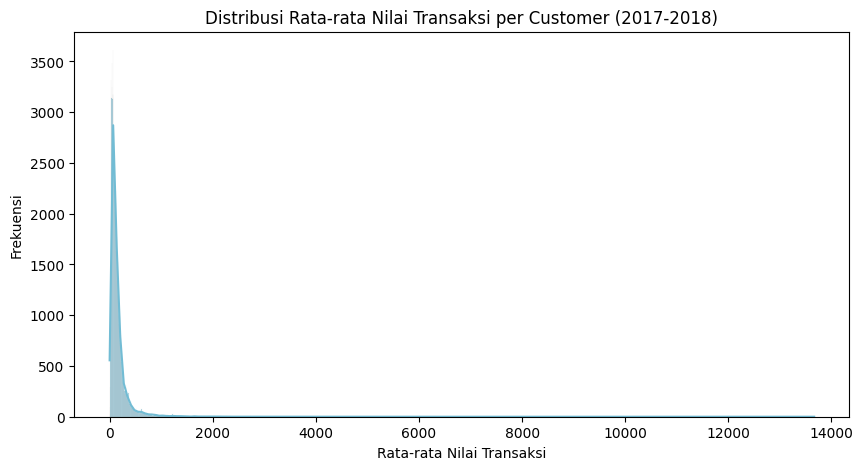

In [39]:
avg_transaction_per_customer = order_payments_merged.groupby('customer_unique_id').agg({
    'payment_value': 'mean'
}).reset_index()

avg_transaction_per_customer.rename(columns={'payment_value': 'avg_payment_value'}, inplace=True)
avg_transaction_per_customer.head()

plt.figure(figsize=(10,5))
sns.histplot(avg_transaction_per_customer['avg_payment_value'], kde=True, color='#72BCD4')
plt.title('Distribusi Rata-rata Nilai Transaksi per Customer (2017-2018)')
plt.xlabel('Rata-rata Nilai Transaksi')
plt.ylabel('Frekuensi')
plt.show()


### Berapa persentase metode pembayaran yang paling banyak digunakan selama periode tersebut?

<ipython-input-40-643100d44b5d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='payment_type', data=payment_type_distribution, palette='Blues_d')


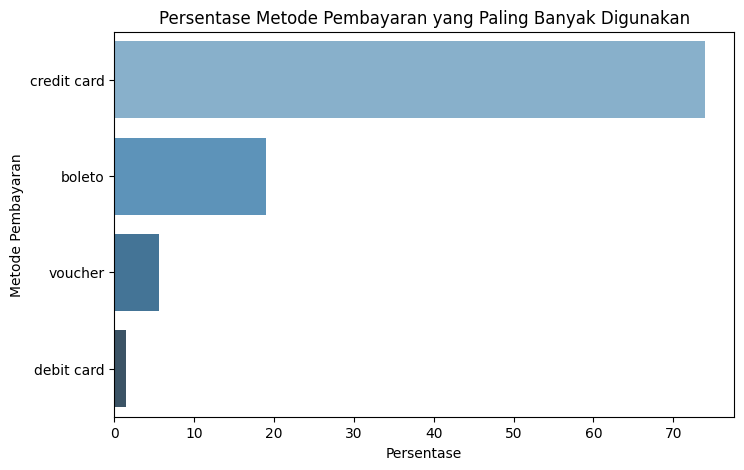

In [40]:
# Mengganti underscore dengan spasi
order_payments_merged['payment_type'] = order_payments_merged['payment_type'].str.replace('_', ' ')

# Menghitung distribusi persentase metode pembayaran
payment_type_distribution = order_payments_merged['payment_type'].value_counts(normalize=True).reset_index()
payment_type_distribution.columns = ['payment_type', 'percentage']
payment_type_distribution['percentage'] = payment_type_distribution['percentage'] * 100

# Menampilkan distribusi
plt.figure(figsize=(8, 5))
sns.barplot(x='percentage', y='payment_type', data=payment_type_distribution, palette='Blues_d')
plt.title('Persentase Metode Pembayaran yang Paling Banyak Digunakan')
plt.xlabel('Persentase')
plt.ylabel('Metode Pembayaran')
plt.show()


### Berdasarkan skor ulasan (review score), bagaimana kepuasan pelanggan terhadap kategori produk tertentu?

<ipython-input-41-627501ca0571>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='product_category_name_english', data=avg_review_by_category.head(10), palette='coolwarm')


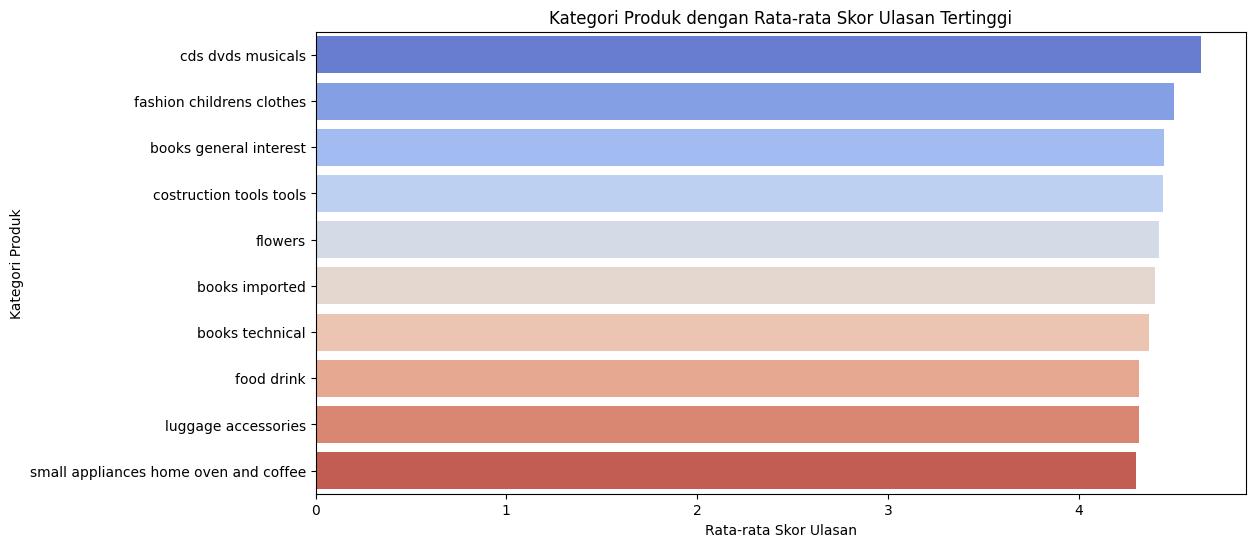

In [41]:
# Mengganti underscore dengan spasi di nama kategori produk
product_reviews_merged['product_category_name_english'] = product_reviews_merged['product_category_name_english'].str.replace('_', ' ')

# Menghitung rata-rata skor ulasan per kategori produk
avg_review_by_category = product_reviews_merged.groupby('product_category_name_english').agg({
    'review_score': 'mean'
}).reset_index().sort_values(by='review_score', ascending=False)

# Menampilkan rata-rata skor ulasan
plt.figure(figsize=(12, 6))
sns.barplot(x='review_score', y='product_category_name_english', data=avg_review_by_category.head(10), palette='coolwarm')
plt.title('Kategori Produk dengan Rata-rata Skor Ulasan Tertinggi')
plt.xlabel('Rata-rata Skor Ulasan')
plt.ylabel('Kategori Produk')
plt.show()


**Insight:**
- Rata-rata nilai transaksi per customer cenderung stabil, menunjukkan bahwa pelanggan berbelanja dengan bijaksana. E-commerce bisa menawarkan program loyalitas untuk mendorong pembelian lebih besar.
- Metode pembayaran yang paling banyak digunakan adalah kartu kredit, diikuti oleh boleto. Ini menunjukkan preferensi pelanggan terhadap metode pembayaran yang cepat. Menambahkan lebih banyak opsi pembayaran dapat meningkatkan pengalaman pengguna.
- Kategori produk seperti elektronik dan fashion memiliki rata-rata skor ulasan yang lebih tinggi. Ini menunjukkan kepuasan pelanggan yang tinggi. E-commerce dapat fokus pada pemasaran produk di kategori ini dan memperbaiki kualitas di kategori dengan skor rendah.

## Analisis Lanjutan (Opsional)

In [42]:
all_df = pd.merge(order_payments_merged, product_reviews_merged, on='order_id', how='left')
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Sebagian besar pelanggan memiliki rata-rata transaksi dalam rentang yang wajar. Distribusi nilai transaksi menunjukkan bahwa mayoritas customer melakukan transaksi dengan jumlah moderat.
- Metode pembayaran yang paling sering digunakan adalah credit card, diikuti oleh boleto. E-commerce dapat mengoptimalkan layanan pembayaran berdasarkan hasil ini.
- Beberapa kategori produk memiliki skor ulasan yang sangat tinggi, menunjukkan bahwa pelanggan puas dengan produk di kategori tersebut.